<a href="https://colab.research.google.com/github/ishancoderr/Data_preparetion_for_research/blob/main/simple%20nural%20network%20_model_with_tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests

**Importing Rainfall data** 

In [2]:
url='https://raw.githubusercontent.com/ishancoderr/Data_preparetion_for_research/master/rainfall_geo_risk_landslide_trigger.csv'

dataset=pd.read_csv(url)

In [3]:
dataset.head()

,Unnamed: 0,new_cum_rainfall,new_hours,new_intensity,new_extracted_Values,status
0,0,223.153,6.123000,36.445043,3,yes
1,1,227.152,6.000000,37.858667,4,yes
2,2,321.524,5.128000,62.699688,4,yes
3,3,120.583,3.234093,37.284952,1,Generated_No
4,4,90.583,8.284411,10.934151,1,Generated_No


In [4]:
dataset["status"] = dataset["status"].apply(lambda x: 1 if x == "yes" else 0)

Hence occur_ can use as output value

In [5]:
dataset = dataset.to_numpy()

In [6]:
print(dataset.shape)

(126, 6)


In [7]:
print(dataset[0:5])

[[  0.         223.153        6.123       36.44504328   3.
    1.        ]
 [  1.         227.152        6.          37.85866667   4.
    1.        ]
 [  2.         321.524        5.128       62.69968799   4.
    1.        ]
 [  3.         120.583        3.23409294  37.28495194   1.
    0.        ]
 [  4.          90.583        8.2844109   10.93415104   1.
    0.        ]]


In [8]:
X=dataset[:,1:-1]

In [9]:
Y=dataset[:,-1]

In [10]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [12]:
print(X.shape,Y.shape)

(126, 4) (126,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [14]:
model=Sequential()


model.add(Dense(1,input_dim=len(X[0,:]),activation='sigmoid'))

In here use sigmoid funstion for classification

In [15]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Epoch 1/1012
3/3 [==============================] - 1s 13ms/step - loss: 5.9351 - accuracy: 0.8191
Epoch 2/1012
3/3 [==============================] - 0s 5ms/step - loss: 5.6558 - accuracy: 0.8191
Epoch 3/1012
3/3 [==============================] - 0s 7ms/step - loss: 5.4550 - accuracy: 0.8191
Epoch 4/1012
3/3 [==============================] - 0s 6ms/step - loss: 5.2758 - accuracy: 0.8191
Epoch 5/1012
3/3 [==============================] - 0s 6ms/step - loss: 5.1278 - accuracy: 0.8191
Epoch 6/1012
3/3 [==============================] - 0s 6ms/step - loss: 4.9793 - accuracy: 0.8191
Epoch 7/1012
3/3 [==============================] - 0s 6ms/step - loss: 4.8373 - accuracy: 0.8085
Epoch 8/1012
3/3 [==============================] - 0s 5ms/step - loss: 4.7042 - accuracy: 0.8085
Epoch 9/1012
3/3 [==============================] - 0s 5ms/step - loss: 4.5677 - accuracy: 0.7872
Epoch 10/1012
3/3 [==============================] - 0s 5ms/step - loss: 4.4442 - accuracy: 0.7872
Epoch 11/1012
3/3 

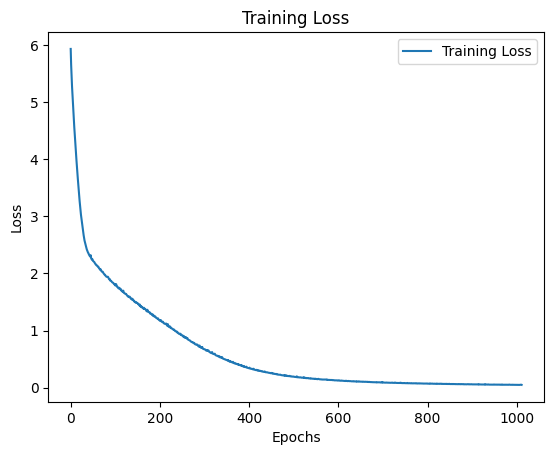

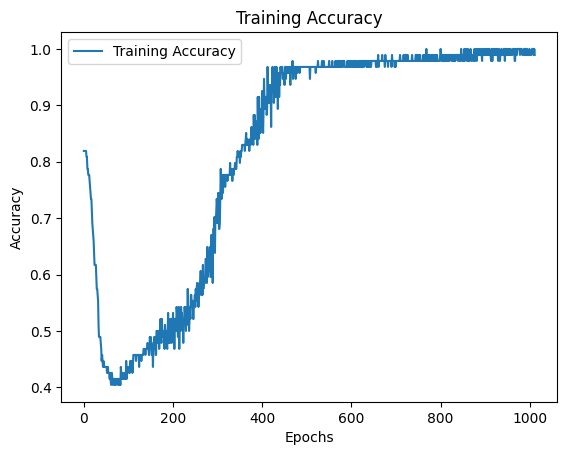

In [16]:
import matplotlib.pyplot as plt

history = model.fit(x=X_train, y=y_train, epochs=1012, verbose=1)

# Accessing loss and accuracy from the training history
loss = history.history['loss']
accuracy = history.history['accuracy']

# Creating a graph to visualize loss
plt.figure()
plt.plot(loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Creating a graph to visualize accuracy
plt.figure()
plt.plot(accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()


In [17]:
print( y_test[:39])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1.]


In [18]:
predictions=model.predict(X_test)

1/1 [==============================] - 0s 81ms/step


In [19]:
predictions= predictions.flatten()
print(predictions[:39],y_test[:39])

[2.8054759e-02 3.4823589e-04 3.5665229e-02 1.1512967e-02 4.8401963e-02
 8.8499188e-03 3.4840373e-04 5.2048579e-02 9.9129397e-03 8.7942296e-01
 1.7412266e-02 3.6931091e-03 4.4420254e-03 4.9816198e-03 4.1371356e-03
 9.9899292e-01 4.5170661e-04 3.2887798e-02 1.0664013e-03 2.7855545e-01
 5.4919487e-03 5.2147526e-03 8.2605081e-03 6.9262356e-02 3.2550335e-02
 8.1092695e-04 9.2490131e-01 6.7011617e-02 2.3640599e-02 8.7217595e-03
 1.0140936e-03 9.9952757e-01] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1.]


In [20]:
data = {'y test':y_test, 'prediction': predictions}
df = pd.DataFrame(data)

print(df)

    y test  prediction
0      0.0    0.028055
1      0.0    0.000348
2      0.0    0.035665
3      0.0    0.011513
4      0.0    0.048402
5      0.0    0.008850
6      0.0    0.000348
7      0.0    0.052049
8      0.0    0.009913
9      1.0    0.879423
10     0.0    0.017412
11     0.0    0.003693
12     0.0    0.004442
13     0.0    0.004982
14     0.0    0.004137
15     1.0    0.998993
16     0.0    0.000452
17     0.0    0.032888
18     0.0    0.001066
19     0.0    0.278555
20     0.0    0.005492
21     0.0    0.005215
22     0.0    0.008261
23     0.0    0.069262
24     0.0    0.032550
25     0.0    0.000811
26     1.0    0.924901
27     0.0    0.067012
28     0.0    0.023641
29     0.0    0.008722
30     0.0    0.001014
31     1.0    0.999528


In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

# The loss and accuracy will be printed to the console
print("Test loss:", loss)
print("Test accuracy:", accuracy)

1/1 [==============================] - 0s 277ms/step - loss: 0.0322 - accuracy: 1.0000
Test loss: 0.03222164511680603
Test accuracy: 1.0


In [ ]:
model.save('/content/rainfallmodel.h5')

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [ ]:
import tensorflow as tf

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name_1 = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name_1, "wb").write(tf_lite_model)

1284

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [1 3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 1]
Output Type: <class 'numpy.float32'>
